<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Меры-центральной-тенденции-(мода,-медиана)" data-toc-modified-id="Меры-центральной-тенденции-(мода,-медиана)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Меры центральной тенденции (мода, медиана)</a></span></li><li><span><a href="#Quiz:-Рассчитайте-среднеквадратическое-отклонение-данных-выборочных-значений" data-toc-modified-id="Quiz:-Рассчитайте-среднеквадратическое-отклонение-данных-выборочных-значений-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Quiz: Рассчитайте среднеквадратическое отклонение данных выборочных значений</a></span><ul class="toc-item"><li><span><a href="#Дисперсия-(Variance)---Java/Groovy" data-toc-modified-id="Дисперсия-(Variance)---Java/Groovy-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Дисперсия (Variance) - Java/Groovy</a></span><ul class="toc-item"><li><span><a href="#Вручную" data-toc-modified-id="Вручную-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Вручную</a></span></li><li><span><a href="#Apache-Commons-Math" data-toc-modified-id="Apache-Commons-Math-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Apache Commons Math</a></span></li><li><span><a href="#Tablesaw" data-toc-modified-id="Tablesaw-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Tablesaw</a></span></li></ul></li><li><span><a href="#Дисперсия-(variance)---Python" data-toc-modified-id="Дисперсия-(variance)---Python-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Дисперсия (variance) - Python</a></span><ul class="toc-item"><li><span><a href="#Вручную" data-toc-modified-id="Вручную-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Вручную</a></span><ul class="toc-item"><li><span><a href="#sum-/-map" data-toc-modified-id="sum-/-map-2.2.1.1"><span class="toc-item-num">2.2.1.1&nbsp;&nbsp;</span>sum / map</a></span></li><li><span><a href="#reduce" data-toc-modified-id="reduce-2.2.1.2"><span class="toc-item-num">2.2.1.2&nbsp;&nbsp;</span>reduce</a></span></li></ul></li></ul></li><li><span><a href="#numpy" data-toc-modified-id="numpy-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>numpy</a></span></li><li><span><a href="#Свойства-Дисперсии-и-среднеквадратичного-отклонения" data-toc-modified-id="Свойства-Дисперсии-и-среднеквадратичного-отклонения-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Свойства Дисперсии и среднеквадратичного отклонения</a></span></li></ul></li><li><span><a href="#Квартили-распределения-и-график-box-plot" data-toc-modified-id="Квартили-распределения-и-график-box-plot-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Квартили распределения и график box-plot</a></span></li><li><span><a href="#Box-Plot" data-toc-modified-id="Box-Plot-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Box Plot</a></span><ul class="toc-item"><li><span><a href="#Задача" data-toc-modified-id="Задача-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Задача</a></span></li><li><span><a href="#Рассуждения-и-решение" data-toc-modified-id="Рассуждения-и-решение-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Рассуждения и решение</a></span></li><li><span><a href="#Другие-примеры-графиков-для-понимания-сути-происходящего" data-toc-modified-id="Другие-примеры-графиков-для-понимания-сути-происходящего-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Другие примеры графиков для понимания сути происходящего</a></span></li></ul></li></ul></div>

# Основы статистики - степик курс

https://stepik.org/course/76/syllabus

Конспект, из комментариев начала: https://docs.google.com/document/d/1d65yVxXWKK4ct-ircA_VfuQ9MbQOzs6Ezr6JQp7Gb4I/pub

**BeakerX** tutorial and demos: http://localhost:7777/notebooks/StartHere.ipynb

## Меры центральной тенденции (мода, медиана)
https://stepik.org/lesson/8075/step/1?unit=1355

https://stepik.org/lesson/%D0%9C%D0%B5%D1%80%D1%8B-%D1%86%D0%B5%D0%BD%D1%82%D1%80%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE%D0%B9-%D1%82%D0%B5%D0%BD%D0%B4%D0%B5%D0%BD%D1%86%D0%B8%D0%B8-8075/step/3?unit=1355:
**Мода** - значение измеряемого признака, встречающееся максимально часто. Может быть несколько чисел, если есть совпадения.

https://stepik.org/lesson/%D0%9C%D0%B5%D1%80%D1%8B-%D1%86%D0%B5%D0%BD%D1%82%D1%80%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE%D0%B9-%D1%82%D0%B5%D0%BD%D0%B4%D0%B5%D0%BD%D1%86%D0%B8%D0%B8-8075/step/4?unit=1355:
**Медиана** - значение признака, которое делит упорядоченное множество даннных пополам.
При чётном количестве признаков, медиана является средним аифметическим двух центральных.

## Quiz: Рассчитайте среднеквадратическое отклонение данных выборочных значений
https://stepik.org/lesson/8076/step/10?unit=1356

Рассчитайте среднеквадратическое отклонение данных выборочных значений:

1 5 2 7 1 9 3 8 5 9

Не забудьте, что при расчете дисперсии и среднеквадратичного отклонения мы вычитаем единицу из общего числа наблюдений!

In [25]:
%%groovy

nums = [1, 5, 2, 7, 1, 9, 3, 8, 5, 9]

[1, 5, 2, 7, 1, 9, 3, 8, 5, 9]

In [26]:
%%groovy

nums.sum()

50

In [27]:
%%groovy
p = new Plot()
p << new Line(y: nums, color: Color.green)

### Дисперсия (Variance) - Java/Groovy

https://stepik.org/lesson/8076/step/8?unit=1356

http://www.cs.sfu.ca/~ggbaker/data-science/content/filtering.html: 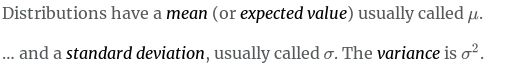

С терминами, разъяснениями и кратинками **на английском**: https://medium.com/dayem-siddiqui/understanding-and-interpreting-box-plots-d07aab9d1b6c

#### Вручную

In [29]:
%%groovy
// Среднее (mean)
Mx = nums.sum() / nums.size()

5

In [38]:
%%groovy
// Дисперсия (variance):
D = nums.sum{ (it - Mx)**2 } / ( nums.size() - 1 )

10

In [40]:
%%groovy
// Стандартное отклонение (standard deviation, std):
Sd = D ** 0.5

3.1622776601683795

#### Apache Commons Math
https://stackoverflow.com/questions/1735870/simple-statistics-java-packages-for-calculating-mean-standard-deviation-etc/1735876#1735876
http://commons.apache.org/proper/commons-math/javadocs/api-3.2/org/apache/commons/math3/stat/descriptive/DescriptiveStatistics.html

In [42]:
%%groovy
@Grab(group='org.apache.commons', module='commons-math3', version='3.6.1')
import org.apache.commons.math3.stat.descriptive.DescriptiveStatistics

In [44]:
%%groovy
%classpath add mvn org.apache.commons commons-math3 3.6.1

null

In [49]:
%%groovy
%import org.apache.commons.math3.stat.descriptive.DescriptiveStatistics

class org.apache.commons.math3.stat.descriptive.DescriptiveStatistics

In [53]:
%%groovy
ds = new DescriptiveStatistics()
nums.each{ ds.addValue(it) }
ds

DescriptiveStatistics:
n: 10
min: 1.0
max: 9.0
mean: 5.0
std dev: 3.1622776601683795
median: 5.0
skewness: 0.0
kurtosis: -1.680952380952382


#### Tablesaw

- https://github.com/jtablesaw/tablesaw
- https://jtablesaw.github.io/tablesaw/gettingstarted

In [61]:
%%groovy
%classpath add mvn tech.tablesaw tablesaw-core LATEST
%import tech.tablesaw.api.DoubleColumn

In [68]:
%%groovy
/* DoubleColumn */ nc = DoubleColumn.create("Test", nums)
nc.print()


Column: Test
1.0
5.0
2.0
7.0
1.0
9.0
3.0
8.0
5.0
9.0


In [69]:
%%groovy
nc.standardDeviation()

3.1622776601683795

### Дисперсия (variance) - Python

In [70]:
nums = [1, 5, 2, 7, 1, 9, 3, 8, 5, 9]

#### Вручную

In [72]:
nums

[1, 5, 2, 7, 1, 9, 3, 8, 5, 9]

In [77]:
# Среднее
Mx = sum(nums) / len(nums)
Mx

5.0

##### sum / map

In [103]:
# Дисперсия:
D = sum(map(lambda it: (it - Mx)**2, nums)) / ( len(nums) - 1 )
D

10.0

##### reduce

In [104]:
from functools import reduce
D = reduce((lambda sum, it: sum + (it - Mx)**2), nums, 0) / ( len(nums) - 1 )
D

10.0

In [107]:
# Стандартное отклонение (Std):
Sd = D**0.5
Sd

3.1622776601683795

### numpy

In [109]:
import numpy as np

In [111]:
np_nums = np.array(nums)
np_nums

array([1, 5, 2, 7, 1, 9, 3, 8, 5, 9])

In [119]:
# https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.var.html
np_nums.var(ddof=1)

10.0

In [120]:
# https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.std.html#numpy.std
np_nums.std(ddof=1)

3.1622776601683795

### Свойства Дисперсии и среднеквадратичного отклонения

1. D(x+c) = D(x). То есть, при добавлении любого числа к каждому элементу выборки - дисперсия не изменится! То есть сама выборка сдвигается, но её форма остаётеся прежней. https://stepik.org/lesson/8076/step/9?unit=1356
То же самое для Sd.
2. D(x*c) = D(x) * c^2
Sd(x*c) = Sd(x) * c
Если каждое значение признака умножить на число С, то стандартное отклонение (Sd) также изменится на эту величину (грачик растянется по x) - изменчивость увеличится

## Квартили распределения и график box-plot
https://stepik.org/lesson/9294/step/1?unit=1827

- **Квантили распределения** (eng [Quantile](https://en.wikipedia.org/wiki/Quantile)) - это такие значения признака, которые делят упорядоченные данные на некоторое число равных частей.
- **Квартили распределения** - это такие 3 точки (значения признака), которые делят наши данные (упорядоченное множество) на 4 равные части

![](https://i.imgur.com/lK6fAkR.png)

## Box Plot

Иногда называют "ящик с усами".
- Рассстояние между 1 и 3 квартилем называют **межквартильный размах**, и это одна из *мер изменчивости*. Чем больше размах, тем больше вариативность нашего признака.
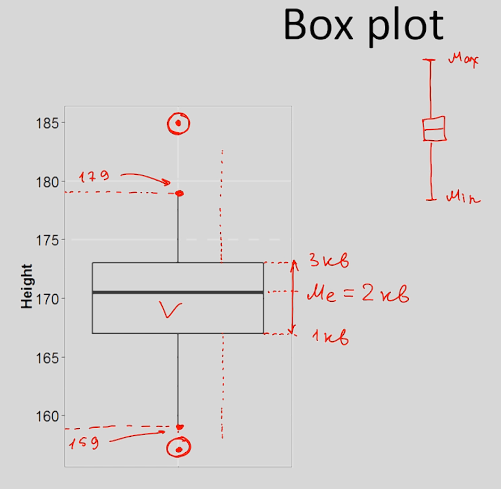

### Задача

https://stepik.org/lesson/9294/step/6?unit=1827

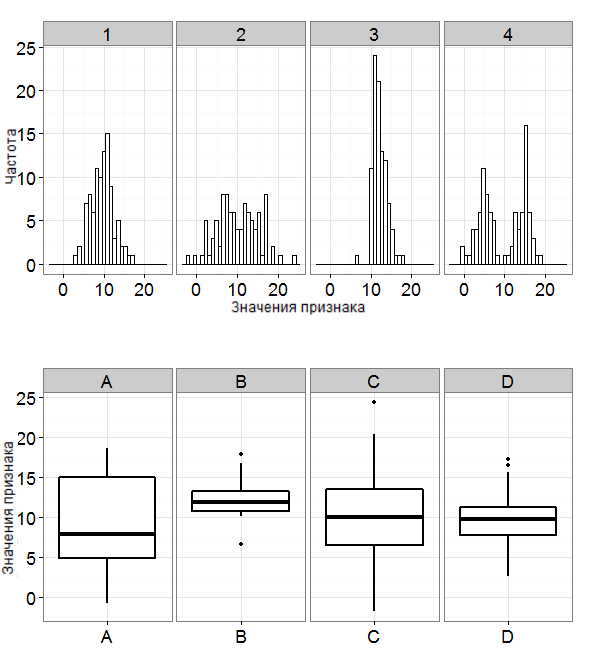

Соотнесите гистограммы частот и графики box-plot

Рассуждаем, смотря на комментарии:
1. https://stepik.org/lesson/9294/step/6?discussion=338940&unit= 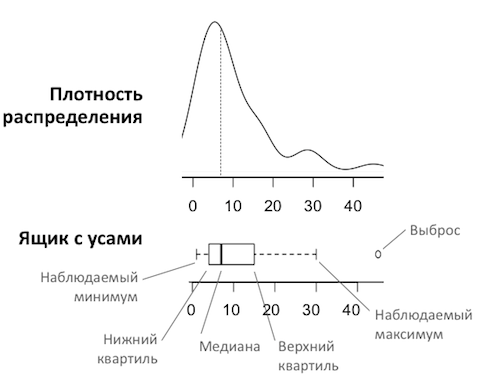

2. https://stepik.org/lesson/9294/step/6?discussion=49764&reply=50212&unit=1827 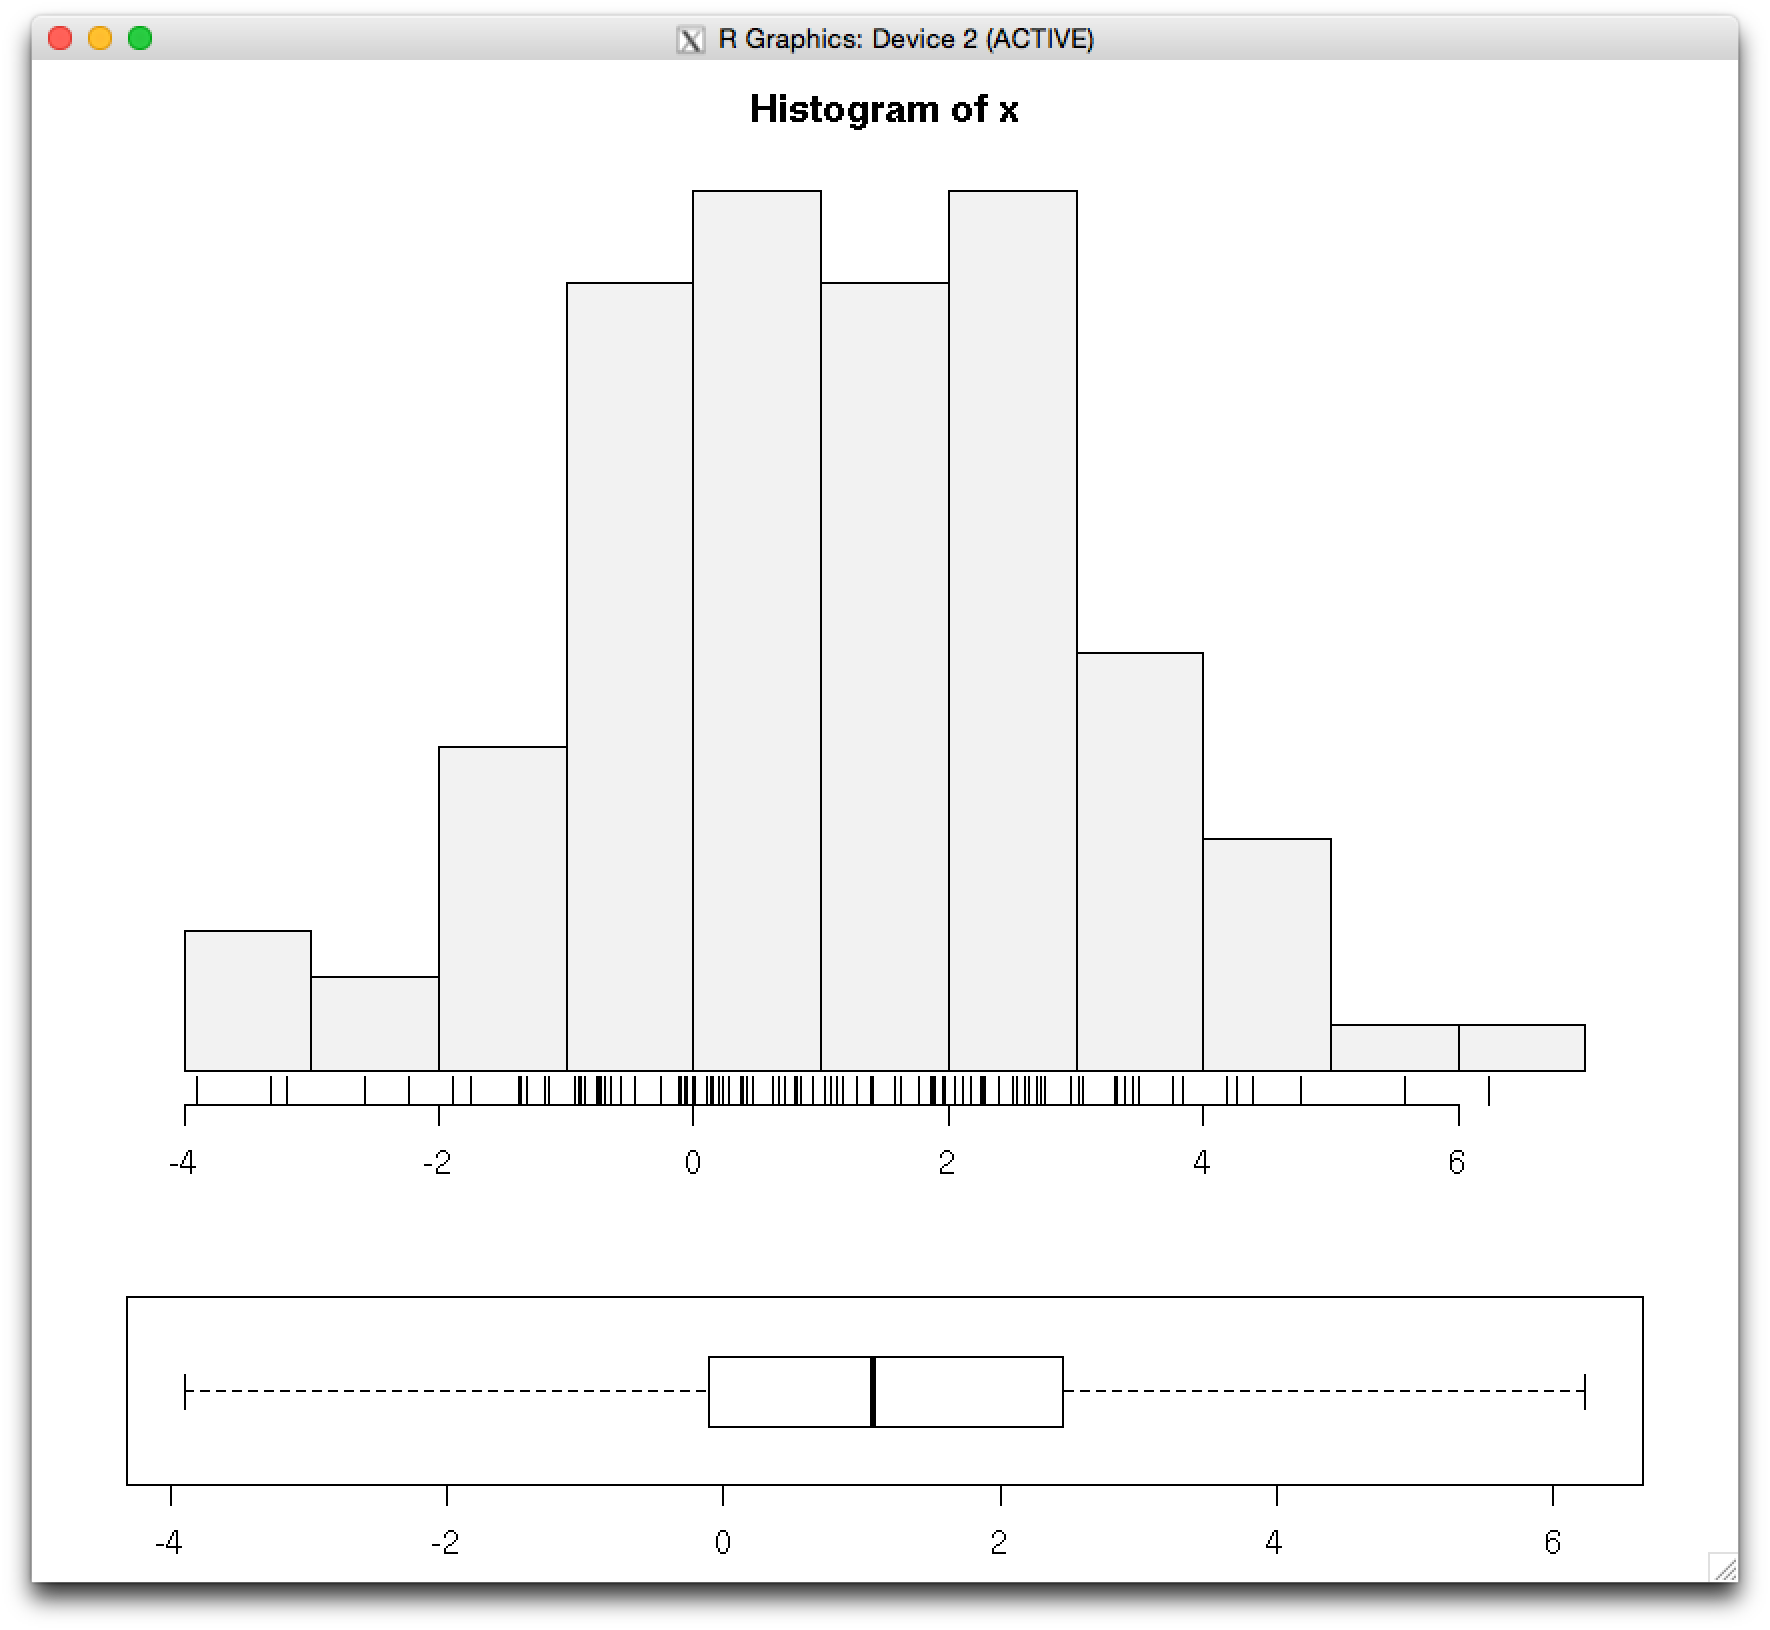

### Рассуждения и решение
1. Отрицательные значения есть только на 2 и 4. Значит они должны соотноситься с А и С.
2. **A - 4**, потому что медиана сильно смещена в межквартильном расстоянии, это потому что по частотам там 2 горба на графике. См. petal_width, petal_length ниже.
3. **C - 2** тогда
4. **B - 3**, потому что медиана сильно смещена вверх, и на графике большинство значений лежат на 10.
5. **D - 1**, остался :)

### Другие примеры графиков для понимания сути происходящего

In [3]:
!pip install seaborn

    100% |████████████████████████████████| 215kB 7.5MB/s ta 0:00:01
    100% |████████████████████████████████| 12.9MB 2.3MB/s ta 0:00:011
    100% |████████████████████████████████| 24.8MB 1.7MB/s ta 0:00:011    55% |█████████████████▉              | 13.8MB 8.5MB/s eta 0:00:02    91% |█████████████████████████████▍  | 22.7MB 7.1MB/s eta 0:00:01
    100% |████████████████████████████████| 71kB 7.7MB/s ta 0:00:01
    100% |████████████████████████████████| 92kB 365kB/s ta 0:00:011


In [5]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/opt/conda/envs/beakerx/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


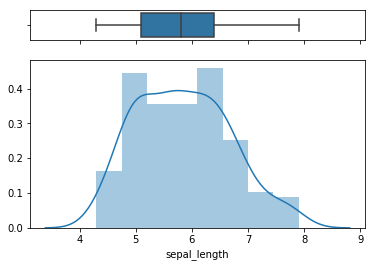

In [16]:
#Experimtns by: https://python-graph-gallery.com/24-histogram-with-a-boxplot-on-top-seaborn/
# Import library and dataset
import seaborn as sns
import matplotlib.pyplot as plt
df = sns.load_dataset('iris')

# Cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# Add a graph in each part
sns.boxplot(df["sepal_length"], ax=ax_box)
sns.distplot(df["sepal_length"], ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='');

In [9]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


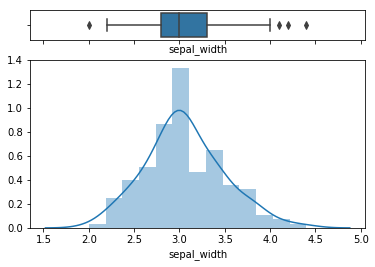

In [12]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(df["sepal_width"], ax=ax_box)
sns.distplot(df["sepal_width"], ax=ax_hist);

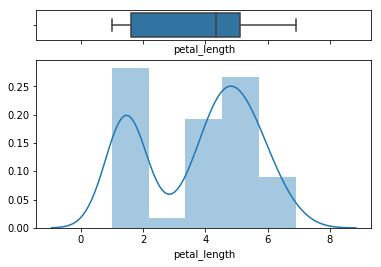

In [13]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(df["petal_length"], ax=ax_box)
sns.distplot(df["petal_length"], ax=ax_hist);

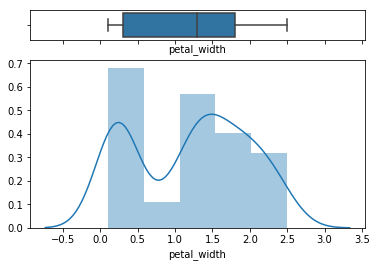

In [18]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(df["petal_width"], ax=ax_box)
sns.distplot(df["petal_width"], ax=ax_hist);

# Нормальное распределение
https://stepik.org/lesson/Нормальное-распределение-9166/step/2?unit=1828

**Нормальное распределение** - это унимодальное и симметричное распределение. При этом отклонение наших значений от среднего подчиняется определённому вероятностному закону